In [ ]:
# Nome: Caio Dantas Simao Ugeda
# NUSP: 11796868

In [1]:
from os import listdir, stat
from os.path import isfile, join, getsize
import pandas as pd
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [2]:
IMG_PATH = './images'

In [7]:
files = [f for f in listdir(IMG_PATH) if isfile(join(IMG_PATH, f))]
print(sorted(files))

['A.jpg', 'B.jpg', 'C.jpg', 'D.jpg', 'E.jpg', 'F.jpg', 'G.jpg', 'H.jpg', 'I.jpg', 'J.jpg', 'K.jpg', 'L.jpg', 'M.jpg', 'N.jpg', 'O.jpg', 'P.jpg', 'Q.jpg', 'R.jpg']


In [6]:
df = pd.read_csv('./metadata.csv')
print(df.columns.values)

['imagem' 'classes' 'fundo' 'luz']


In [8]:
classesDict = {}
backgroundDict = {}
lightDict = {}

In [9]:
for idx, row in df.iterrows():
  if backgroundDict.get(row['fundo']) is None:
      backgroundDict[row['fundo']] = []
  if lightDict.get(row['luz']) is None:
      lightDict[row['luz']] = []
  backgroundDict[row['fundo']].append(row['imagem'])
  lightDict[row['luz']].append(row['imagem'])
  for classe in row['classes'].split(","):
    if classesDict.get(classe) is None:
      classesDict[classe] = []
    classesDict[classe].append(row['imagem'])

In [10]:
print(classesDict)
print(backgroundDict)
print(lightDict)

{'faca': ['A.jpg', 'C.jpg', 'F.jpg', 'H.jpg', 'I.jpg', 'K.jpg', 'M.jpg', 'O.jpg', 'R.jpg'], 'celular': ['A.jpg', 'C.jpg', 'E.jpg', 'H.jpg', 'J.jpg', 'L.jpg', 'M.jpg', 'O.jpg', 'R.jpg'], 'colher': ['A.jpg', 'C.jpg', 'F.jpg', 'G.jpg', 'J.jpg', 'L.jpg', 'N.jpg', 'P.jpg', 'Q.jpg'], 'caneta': ['A.jpg', 'D.jpg', 'E.jpg', 'G.jpg', 'I.jpg', 'L.jpg', 'N.jpg', 'P.jpg', 'Q.jpg'], 'prendedor': ['A.jpg', 'D.jpg', 'E.jpg', 'H.jpg', 'I.jpg', 'K.jpg', 'N.jpg', 'O.jpg', 'R.jpg'], 'garfo': ['B.jpg', 'C.jpg', 'F.jpg', 'H.jpg', 'J.jpg', 'K.jpg', 'M.jpg', 'O.jpg', 'Q.jpg'], 'lego': ['B.jpg', 'C.jpg', 'E.jpg', 'G.jpg', 'J.jpg', 'L.jpg', 'M.jpg', 'P.jpg', 'Q.jpg'], 'oculos': ['B.jpg', 'D.jpg', 'F.jpg', 'G.jpg', 'J.jpg', 'L.jpg', 'M.jpg', 'P.jpg', 'R.jpg'], 'relogio': ['B.jpg', 'D.jpg', 'F.jpg', 'G.jpg', 'I.jpg', 'K.jpg', 'N.jpg', 'O.jpg', 'Q.jpg'], 'tampa': ['B.jpg', 'D.jpg', 'E.jpg', 'H.jpg', 'I.jpg', 'K.jpg', 'N.jpg', 'P.jpg', 'R.jpg']}
{'vermelho': ['A.jpg', 'B.jpg', 'C.jpg', 'D.jpg', 'E.jpg', 'F.jpg'], '

In [12]:
print("Informações sobre os dados")
print(f'Número de classes: {len(classesDict)}')
print(f'Número de fundos: {len(backgroundDict)}')
print(f'Número de iluminações: {len(lightDict)}')
print(f'Número de imagens: {len(files)}')
print(f'Tamanho total do dataset: {sum([getsize(join(IMG_PATH, f)) for f in listdir(IMG_PATH) if isfile(join(IMG_PATH, f))])/ (1024**2):.2f} MB')
print(f'Resolução das imagens: {set([imread(join(IMG_PATH, f)).shape[:2] for f in listdir(IMG_PATH) if isfile(join(IMG_PATH, f))])}')


Informações sobre os dados
Número de classes: 10
Número de fundos: 3
Número de iluminações: 4
Número de imagens: 18
Tamanho total do dataset: 76.56 MB
Resolução das imagens: {(5712, 4284)}


In [14]:
def plot_imgs(title, images):
  columns = len(images)
  i = 0
  for f in sorted(images):
    img = imread(join(IMG_PATH, f))
    plt.subplot(len(images) // columns + 1, columns, i + 1)
    plt.axis('off')
    plt.imshow(img)
    i += 1
  plt.suptitle(title)
  plt.show()

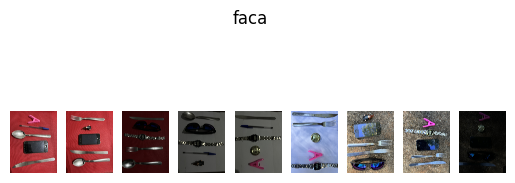

-----------------------------------------------------------------------


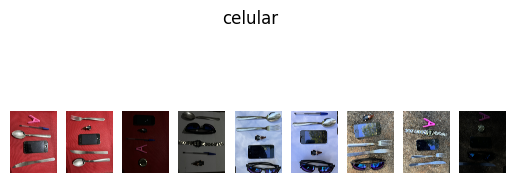

-----------------------------------------------------------------------


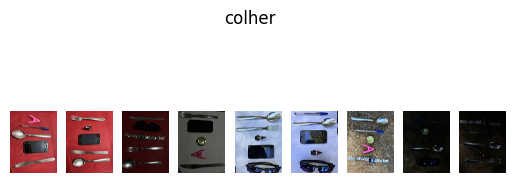

-----------------------------------------------------------------------


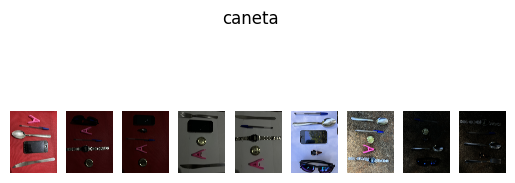

-----------------------------------------------------------------------


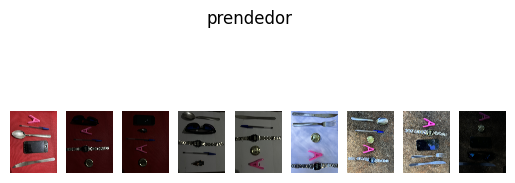

-----------------------------------------------------------------------


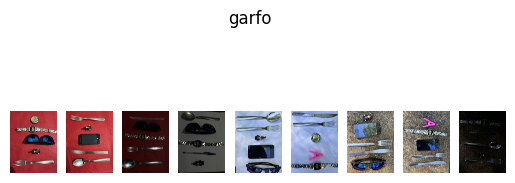

-----------------------------------------------------------------------


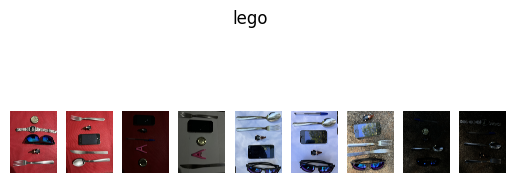

-----------------------------------------------------------------------


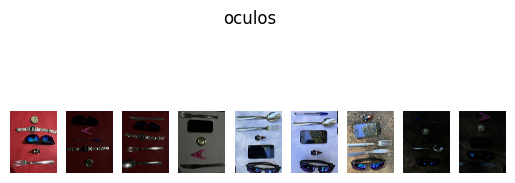

-----------------------------------------------------------------------


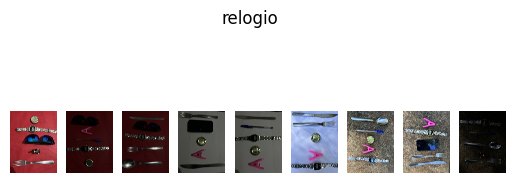

-----------------------------------------------------------------------


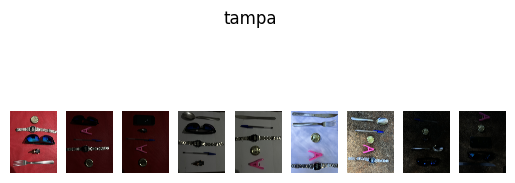

-----------------------------------------------------------------------


In [17]:
for k, v in classesDict.items():
  plot_imgs(k, v)
  print("---------------------------------------------------------------")

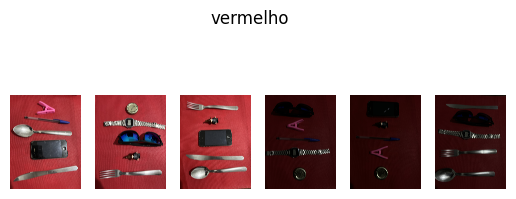

---------------------------------------------------------------


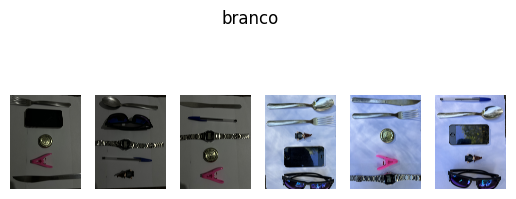

---------------------------------------------------------------


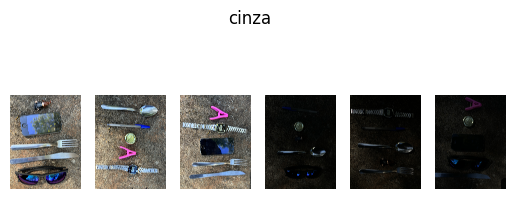

---------------------------------------------------------------


In [18]:
for k, v in backgroundDict.items():
  plot_imgs(k, v)
  print("---------------------------------------------------------------")

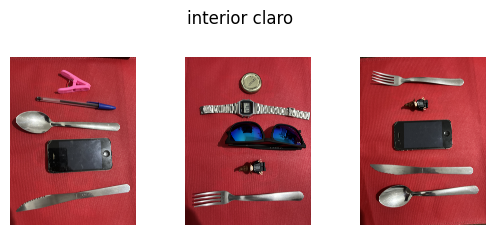

---------------------------------------------------------------


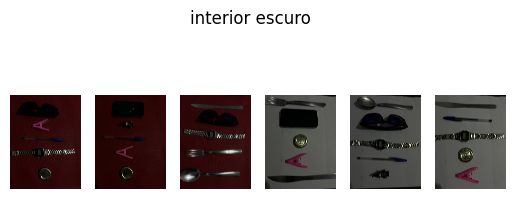

---------------------------------------------------------------


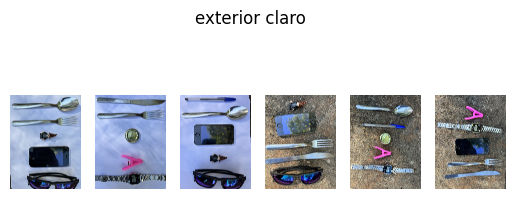

---------------------------------------------------------------


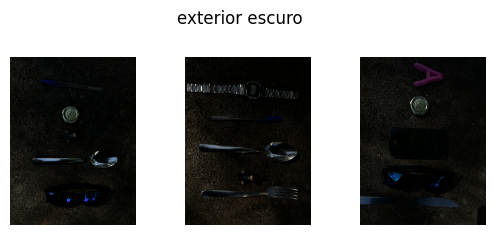

---------------------------------------------------------------


In [19]:
for k, v in lightDict.items():
  plot_imgs(k, v)
  print("---------------------------------------------------------------")